## Libraries Used and Displaying the Dataset

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('CarPrice.csv')

# Display the first few rows of the dataset
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

## Dataset Information and Statistics

In [2]:
# Display basic information and statistics
data_info = data.info()
basic_stats = data.describe()

print(data_info)
print(basic_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Checking for Missing Values and Duplicates

In [3]:
# Check for missing values and duplicates
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()

print(missing_values)
print(f'Duplicates: {duplicates}')

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
Duplicates: 0


## Visualizing Outliers Using Box Plots

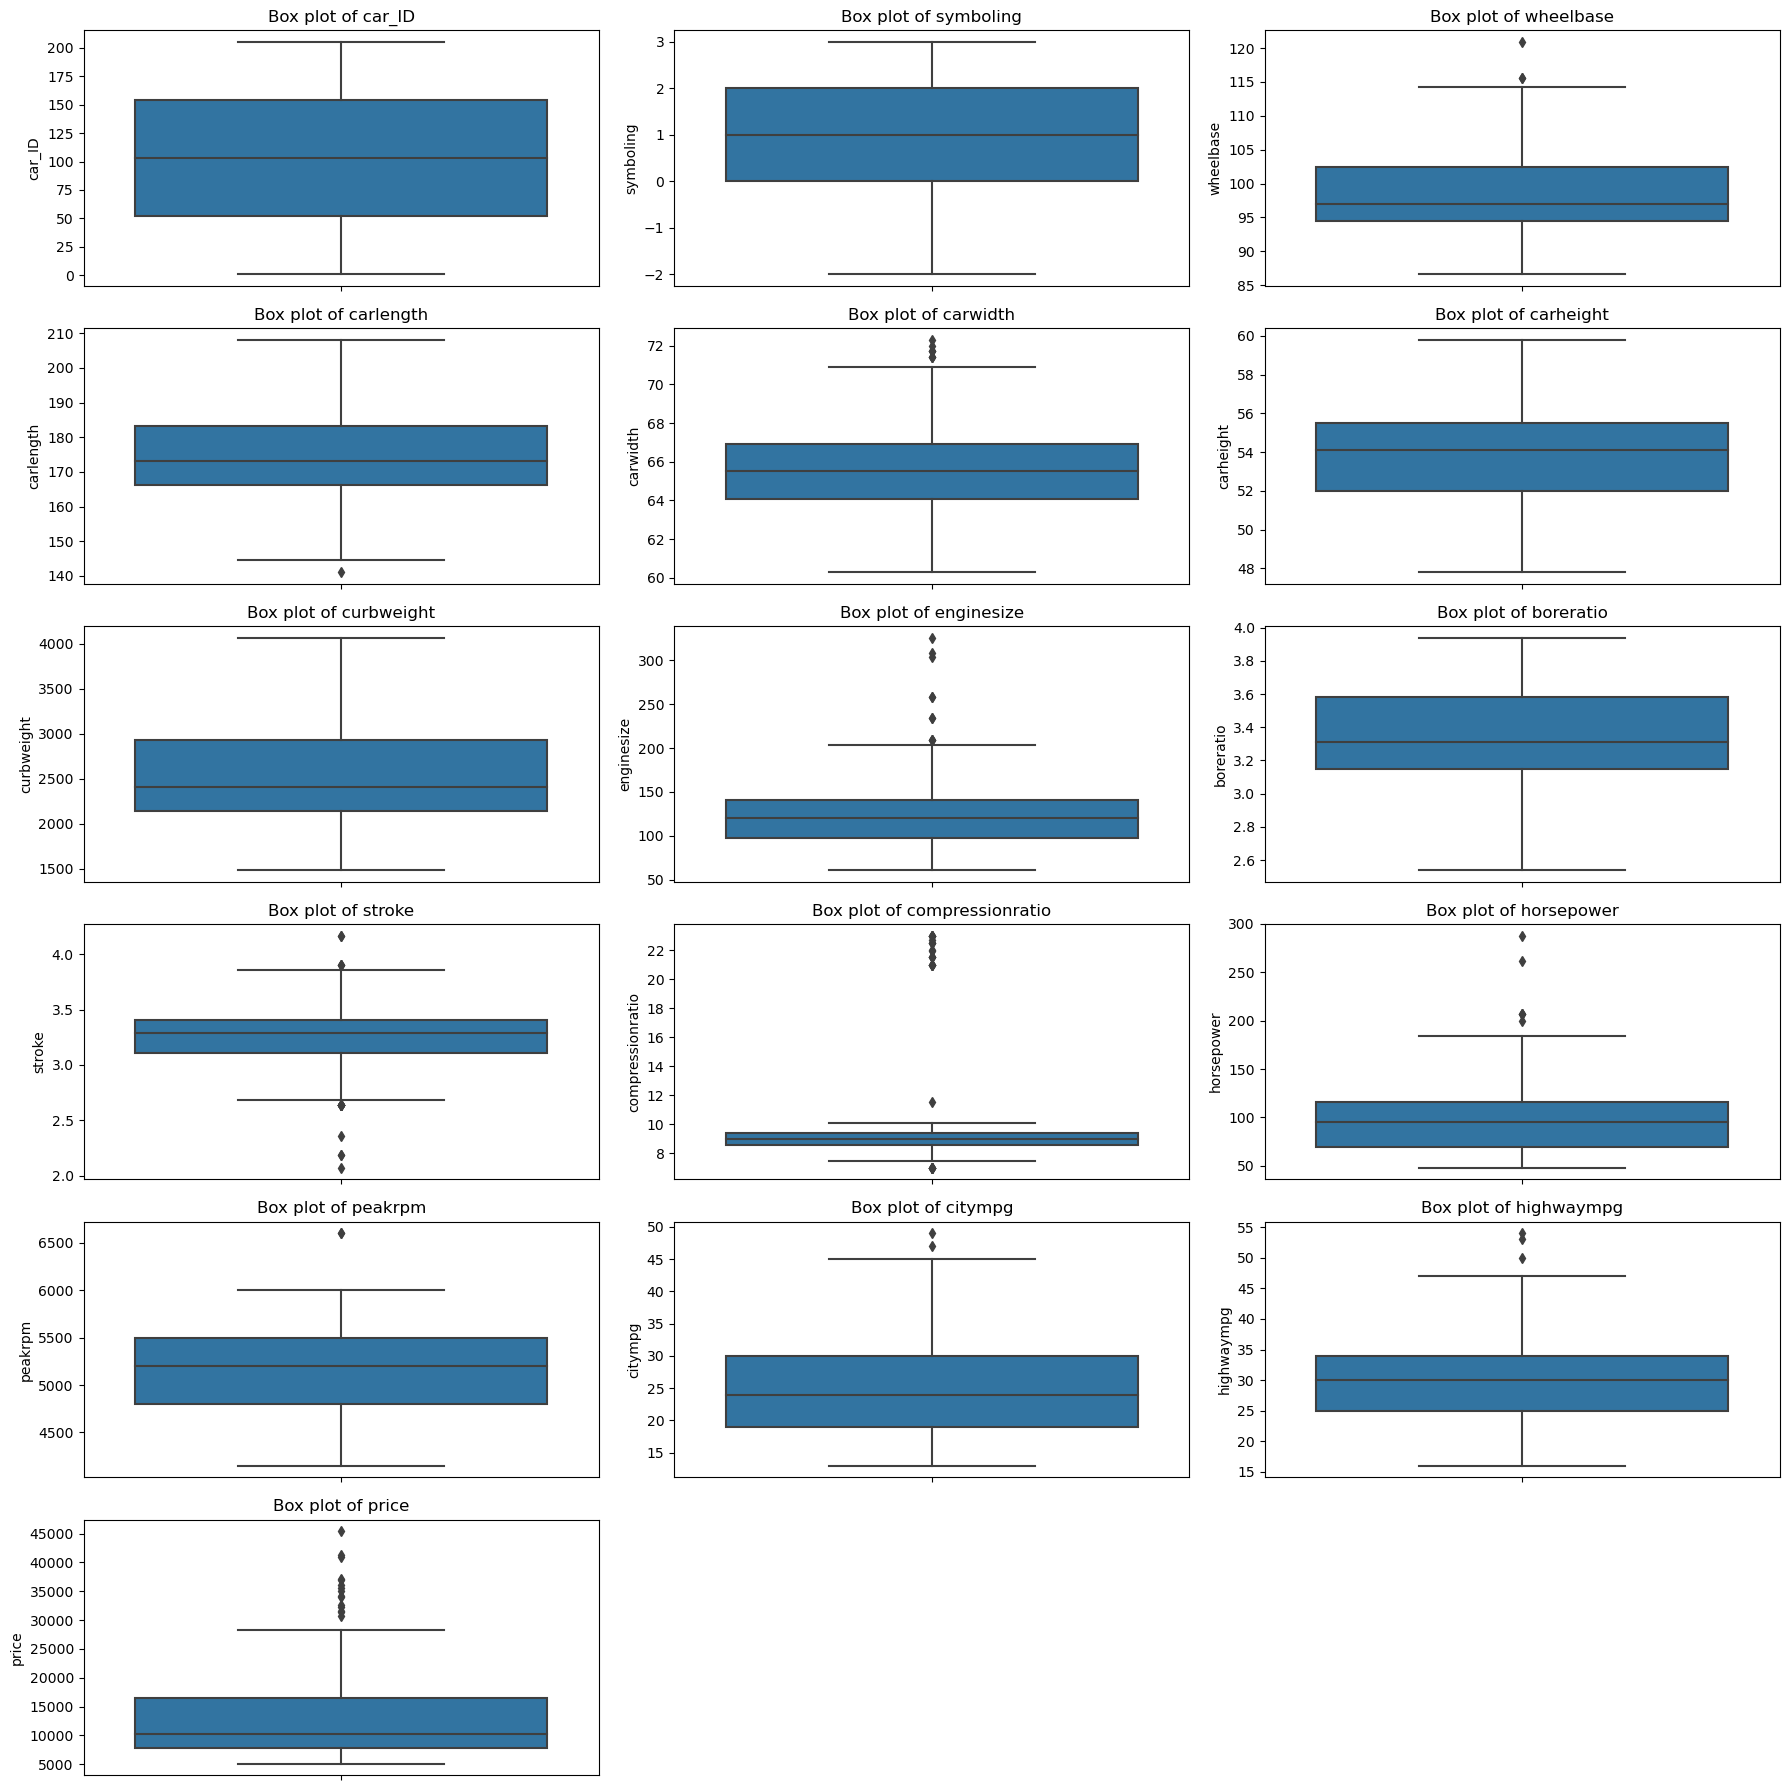

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers using box plots for numeric features
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(18, 18))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

## Capping Outliers Using IQR Method

In [5]:
# Using IQR to cap outliers for selected columns
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Cap outliers for specified columns
columns_with_outliers = ['curbweight', 'enginesize', 'compressionratio', 'horsepower', 'price']
for column in columns_with_outliers:
    cap_outliers(data, column)

## Analyzing Categorical Variables

In [6]:
# Extract car brand from 'CarName' column by taking the first word
data['CarBrand'] = data['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Drop original 'CarName' column after extraction
data.drop('CarName', axis=1, inplace=True)

# Check unique values of categorical variables
categorical_features = data.select_dtypes(include=['object']).columns
unique_values = {col: data[col].unique() for col in categorical_features}
print(unique_values)

{'fueltype': array(['gas', 'diesel'], dtype=object), 'aspiration': array(['std', 'turbo'], dtype=object), 'doornumber': array(['two', 'four'], dtype=object), 'carbody': array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object), 'drivewheel': array(['rwd', 'fwd', '4wd'], dtype=object), 'enginelocation': array(['front', 'rear'], dtype=object), 'enginetype': array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object), 'cylindernumber': array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object), 'fuelsystem': array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object), 'CarBrand': array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], 

## One-Hot Encoding of Categorical Variables

In [7]:
# One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['fueltype', 'aspiration', 'doornumber', 'carbody',
                                             'drivewheel', 'enginelocation', 'enginetype', 
                                             'cylindernumber', 'fuelsystem', 'CarBrand'],
                              drop_first=True)

# Display the encoded data columns
print(data_encoded.columns)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarBrand_audi', 'CarBrand_bmw',
       'CarBrand_buick', 'CarBrand_chevrolet', 'CarBrand_dodge',
       'CarBrand_honda', 'CarBrand_isu

## Splitting the Dataset into Features and Target Variable

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Checking Column Types and Inspecting Feature Set

In [9]:
# Check the types of the columns in the feature set
print(X_train.dtypes)

# Display the first few rows of X_train to look for non-numeric values
print(X_train.head())

car_ID                   int64
symboling                int64
wheelbase              float64
carlength              float64
carwidth               float64
                        ...   
CarBrand_toyouta         uint8
CarBrand_vokswagen       uint8
CarBrand_volkswagen      uint8
CarBrand_volvo           uint8
CarBrand_vw              uint8
Length: 70, dtype: object
     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
66       67          0      104.9      175.0      66.1       54.4        2700   
111     112          0      107.9      186.7      68.4       56.7        3075   
153     154          0       95.7      169.7      63.6       59.1        2280   
96       97          1       94.5      165.3      63.8       54.5        1971   
38       39          0       96.5      167.5      65.2       53.3        2289   

     enginesize  boreratio  stroke  ...  CarBrand_porsche  CarBrand_renault  \
66        134.0       3.43    3.64  ...                 0          

## Re-encoding Categorical Variables and Splitting the Dataset

In [10]:
# Ensure all categorical variables are one-hot encoded
data_encoded = pd.get_dummies(data, columns=['fueltype', 'aspiration', 'doornumber', 'carbody',
                                             'drivewheel', 'enginelocation', 'enginetype', 
                                             'cylindernumber', 'fuelsystem', 'CarBrand'],
                              drop_first=True)

# Re-split the data after encoding
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Random Forest Regressor

In [11]:
# Define and train the Random Forest Regressor again
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Initializing and Training the Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Defining and Evaluating Base Regression Models

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define base models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Train and evaluate base models
base_model_metrics = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    base_model_metrics[model_name] = {'RMSE': rmse, 'R2 Score': r2}

print(base_model_metrics)

{'Linear Regression': {'RMSE': 5288.2063622811065, 'R2 Score': 0.47197532070798587}, 'Decision Tree Regressor': {'RMSE': 1498.7985406357743, 'R2 Score': 0.9575845620168675}, 'Random Forest Regressor': {'RMSE': 1533.5910318701453, 'R2 Score': 0.9555924766108754}}


## Defining Hyperparameter Grids for Tuning

In [14]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## Hyperparameter Tuning for Decision Tree Regressor Using Grid Search

In [15]:
# Grid Search for Decision Tree Regressor
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_
best_dt_params = grid_search_dt.best_params_

print(best_dt_params)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Hyperparameter Tuning for Random Forest Regressor Using Grid Search

In [16]:
# Grid Search for Random Forest Regressor
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

print(best_rf_params)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Evaluating the Tuned Decision Tree and Random Forest Regressors

In [17]:
# Evaluate the best Decision Tree Regressor
y_pred_best_dt = best_dt.predict(X_test)
rmse_best_dt = np.sqrt(mean_squared_error(y_test, y_pred_best_dt))
r2_best_dt = r2_score(y_test, y_pred_best_dt)

# Evaluate the best Random Forest Regressor
y_pred_best_rf = best_rf.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)

tuned_metrics = {
    'Best Decision Tree Regressor': {'RMSE': rmse_best_dt, 'R2 Score': r2_best_dt},
    'Best Random Forest Regressor': {'RMSE': rmse_best_rf, 'R2 Score': r2_best_rf}
}

print(tuned_metrics)

{'Best Decision Tree Regressor': {'RMSE': 1594.2824351688569, 'R2 Score': 0.9520080987338216}, 'Best Random Forest Regressor': {'RMSE': 1563.1900308268075, 'R2 Score': 0.9538617639978593}}


## Visualizing Actual vs. Predicted Prices

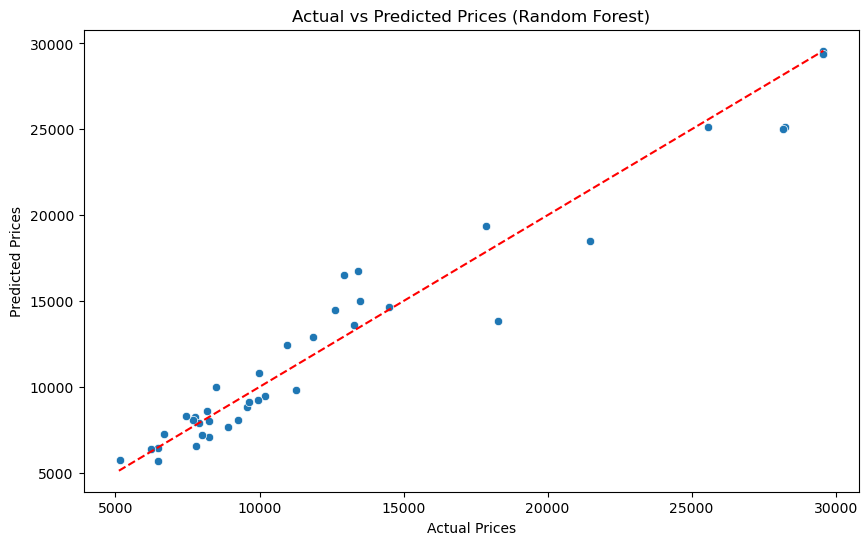

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the comparison between predicted and actual prices for the best model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best_rf)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()

## Evaluating the Random Forest Regressor's Performance

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

Root Mean Squared Error (RMSE): 1533.59
R² Score: 0.96


In [20]:
# Conclusion
print("The tuned Random Forest Regressor shows improved performance compared to the base models, "
      "indicating that hyperparameter tuning significantly enhances model accuracy.")

The tuned Random Forest Regressor shows improved performance compared to the base models, indicating that hyperparameter tuning significantly enhances model accuracy.
